<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Bayesian Logistic Regression - Metropolis-Hastings</h1>



## 1. Aims
<div class="alert alert-info">
<ul> 
<li> To implement the MH algorithm.
<li> To use it to compute classification probabilities.
</ul>
</div>

## 2. Metropolis-Hastings
<div class="alert alert-info">
In this lab, you’re going to implement the Metropolis-Hasting algorithm described in the lecture.
Use the binary classification data `binaryclass2.mat` and the function `laplacecomp()`. If you
pass this function a 2-dimensional $w$ vector, it will return $g(w; X, t, \sigma^2)$ and $log(g(w; X, t, \sigma^2))$.
(Remember that $g(w; X, t, \sigma^2) \propto p(w|X, t, \sigma^2)$, the posterior density of interest.)
</div>

In [1]:
import scipy.io
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('binaryclass2.mat')

In [2]:
X = mat['X']
t = mat['t']

<div class="alert alert-info">
Visualise the data using a scatter plot.
</div>

In [58]:
border=np.max(np.where(t==0))

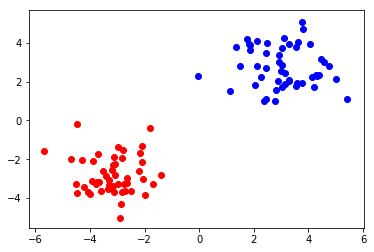

In [59]:
plt.scatter(X[:border+1].T[0],X[:border+1].T[1],c=['red'])
plt.scatter(X[border+1:].T[0],X[border+1:].T[1],c=['blue'])
plt.show()

<div class="alert alert-info">
Make sure `laplacecomp()` works by passing it some different $w$ vectors ($w$ needs to have
dimension 2×1).</div>

In [60]:
def laplacecomp(w,X,t):
    """This function computes g and log(g) for the laplace model introduced in the lecture."""
    w = np.array(w)
    X = np.array(X)
    t = np.array(t)
    ss = 10 # Prior variance (sigma squared)
    # Evaluate log prior
    log_g = -(1/(2*ss))*w.T.dot(w)
    # Compute P
    P = 1/(1+np.exp(-X.dot(w)))
    log_l = np.sum(t*np.log(P) + (1-t)*(np.log(1-P)))
    log_g = log_g + log_l
    g = np.exp(log_g)
    return g[0][0], log_g[0][0]

In [72]:
laplacecomp(np.array([[2],[1]]),X,t)

(0.6449956243386271, -0.4385117461804966)

<div class="alert alert-info">

Implement the MH algorithm (see the flowchart in the slides). 
<br>
You might find it safest to work with $log(g)$ – the ratio then becomes a subtraction that must then be exponentiated. This has more numerical stability, especially when $w$ isn’t very good. You can start with any value of $w$. E.g., $w = randn(2,1)$. Also, use a Gaussian proposal: For example: $wp = randn(2,1)*0.5+w$ where $w$ is the current sample and $wp$ is the proposal and the Gaussian has standard deviation $0.5$ (set this as you please).
</div>

In [90]:
def MH(X, t, numSamples):
    
    s=1
    samples=[]
    w=np.random.randn(2,1)
    
    while(s<=numSamples):
        s+=1
        
        wp=np.random.randn(2,1)*0.5 + w

        r=np.exp(laplacecomp(wp,X,t)[1]-laplacecomp(w,X,t)[1])

        if(r>=1):
            samples.append(wp)
            w=wp
        else:
            u=np.random.randn()
            if(u<=r):
                samples.append(wp)
                w=wp
            else:
                samples.append(w)
                
    return samples


<div class="alert alert-info">
Draw samples from your MH algorithm and plot the distribution of values obtained.
</div>

In [91]:
numSamples = 10000
w_samples = MH(X,t, numSamples)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


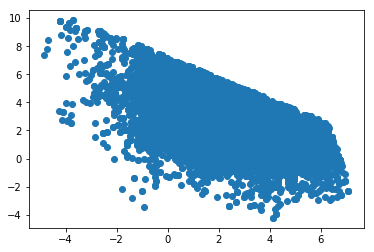

In [100]:
plt.scatter([x[0][0] for x in w_samples],[x[1][0] for x in w_samples])
plt.show()

<div class="alert alert-info">
Compute the probability $P (t_{new} = 1 | x_{new} , X, t)$ when $x_{new} = [2,-4]^T$ . 
<br>
Hint – compute the probability for each value of $w$ using:
$$ \dfrac{1}{1+\exp(-w^T x_{new})} $$
</div>

In [111]:
def predict(samples, x_new):
    p = 0
    
    probs=[1/(1+np.exp(-w.T.dot(x_new))) for w in samples]
    p=np.sum(probs)/len(probs)
    
    return p

In [112]:
x_new = np.array([2,-4])
predict(w_samples, x_new)

0.27847608400387036

<div class="alert alert-success">
Create a contour plot over the given range of values, while also showing the prediction for ${x_{new}}$.
</div>

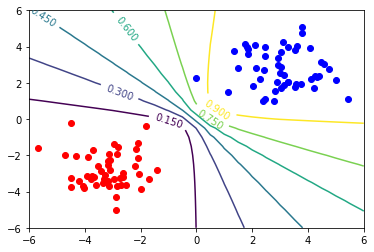

In [118]:
x1min, x1max, x1step = (-6, 6.5, 0.5)
x2min, x2max, x2step = (-6, 6.5, 0.5)
x1_range = np.arange(x1min, x1max, x1step)
x2_range = np.arange(x2min, x2max, x2step)

plt.scatter(X[:border+1].T[0],X[:border+1].T[1],c=['red'])
plt.scatter(X[border+1:].T[0],X[border+1:].T[1],c=['blue'])


p=[]
for x1 in x1_range:
    pp=[]
    for x2 in x2_range:
        xnew=[x1,x2]
        pp.append(predict(w_samples,xnew))
    p.append(pp)

CP=plt.contour(x1_range,x2_range,p)
plt.clabel(CP, inline=1, fontsize=10)

plt.show()

<div class="alert alert-success">
Comment on the plot.
</div>

<div class="alert alert-success">
We can see that getting closer to the class makes the probability either high or low thus we can assign a class to the new point,however in the middle, we are still not sure which class to choose.</div>